In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import pandas as pd

In [6]:
df = pd.read_csv('diabetes.csv')
print(df.shape)

(768, 9)


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
num_features = [i for i in df.columns if i not in 'Outcome']
print(num_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


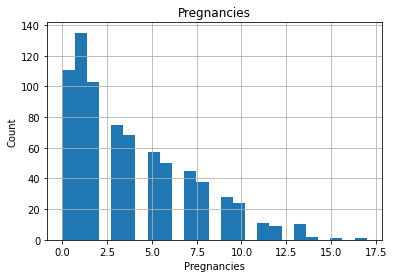

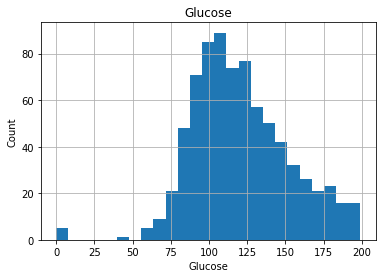

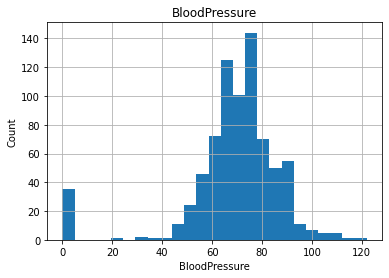

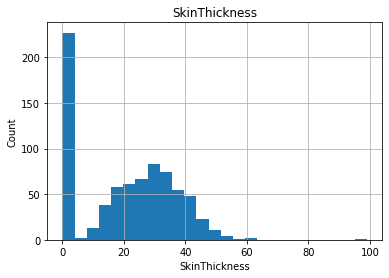

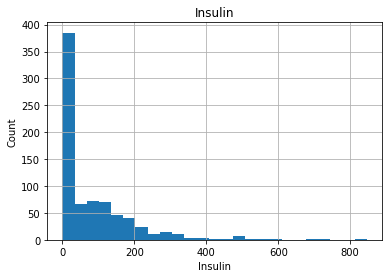

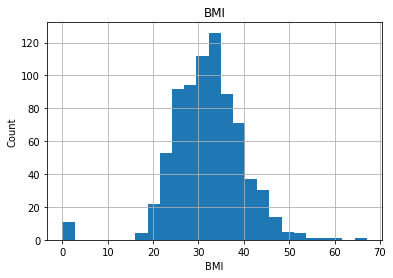

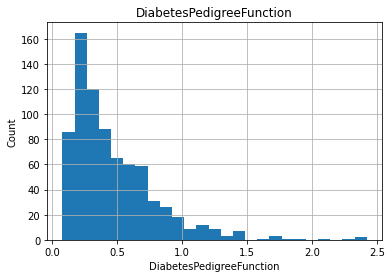

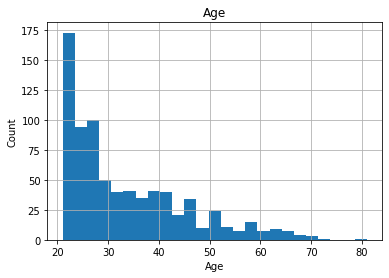

In [14]:
for feature in num_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


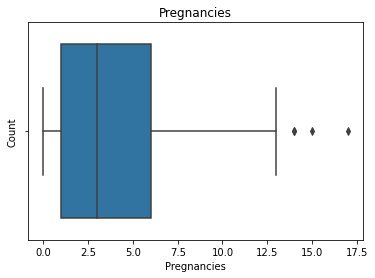

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


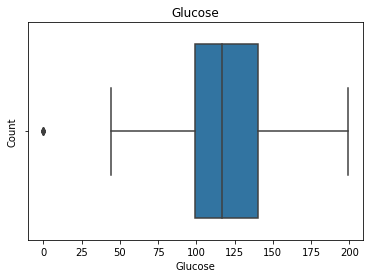

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


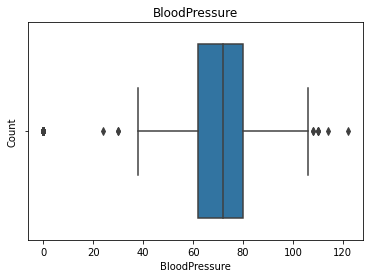

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


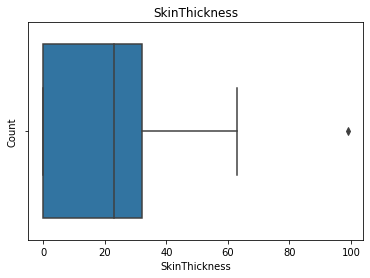

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


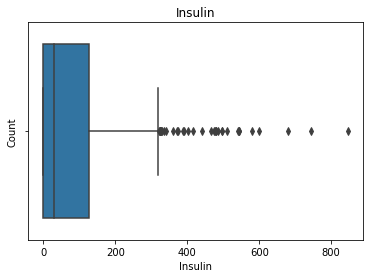

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


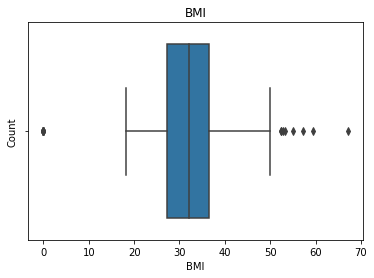

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


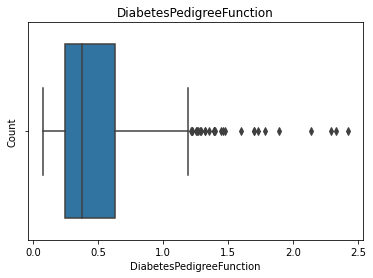

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


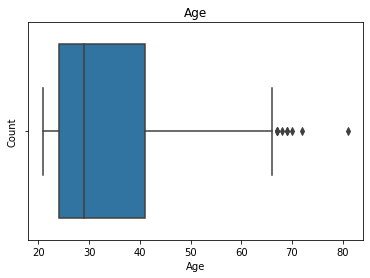

In [18]:
for feature in num_features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [22]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [24]:
X_train_scaled

array([[ 1.23378966, -0.0511621 ,  0.85869474, ..., -0.46829943,
        -0.64273688, -0.9585956 ],
       [ 0.04454814, -1.16533665,  1.06833235, ...,  0.96363916,
        -0.95709873, -0.70778124],
       [-0.55007263,  0.01073648, -0.50394968, ..., -0.28769456,
         0.79704042, -0.9585956 ],
       ...,
       [ 0.6391689 ,  0.38212799,  0.02014433, ...,  0.43472491,
         0.24690717, -0.37336209],
       [-0.55007263, -0.9486916 , -0.39913088, ..., -0.61020325,
         0.19346566, -0.9585956 ],
       [-0.84738301,  0.50592517,  0.64905714, ...,  1.04104125,
        -0.71504011, -0.45696688]])

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [26]:
from torch import nn
import torch.nn.functional as F

In [27]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8, 12)
        self.hidden2 = nn.Linear(12,6)
        self.output = nn.Linear(6,2)
        
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x),dim = 1)
        return x

model = Network()

In [28]:
model

Network(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (hidden2): Linear(in_features=12, out_features=6, bias=True)
  (output): Linear(in_features=6, out_features=2, bias=True)
)

In [32]:
print(model.hidden1.bias)

Parameter containing:
tensor([ 0.3299, -0.1459, -0.0623,  0.0198,  0.2628, -0.1399, -0.2994, -0.1864,
         0.0320, -0.1606, -0.2864, -0.0042], requires_grad=True)


In [33]:
print(model.hidden1.weight)

Parameter containing:
tensor([[-0.2468, -0.1292,  0.1590, -0.1536,  0.1678,  0.2364,  0.1603,  0.1261],
        [ 0.3330, -0.1533,  0.3280,  0.1882, -0.1604,  0.2854,  0.2972,  0.3352],
        [ 0.0613,  0.0472,  0.0452,  0.0722, -0.0020, -0.1132, -0.0348, -0.2947],
        [ 0.0952, -0.1023,  0.1492, -0.0214,  0.0758,  0.0565,  0.2742,  0.2034],
        [ 0.1226,  0.1202,  0.1453,  0.3150, -0.0079,  0.2037, -0.2226, -0.1553],
        [ 0.1309,  0.1143, -0.1541, -0.1559,  0.2761, -0.0591, -0.2595, -0.0287],
        [-0.3168,  0.2905, -0.1784, -0.0820,  0.2409,  0.1005, -0.0741,  0.2359],
        [ 0.3302,  0.3369, -0.2276, -0.0178,  0.1765, -0.0352,  0.1206, -0.0890],
        [-0.2120, -0.1388,  0.2681,  0.2569,  0.3363,  0.3025,  0.1570,  0.3194],
        [ 0.0429,  0.0512, -0.2289, -0.3448,  0.2649, -0.2513,  0.0626, -0.2624],
        [ 0.0136,  0.2983, -0.0170, -0.0750,  0.2306, -0.2841,  0.2530,  0.2678],
        [ 0.1028,  0.1867, -0.3120, -0.0338, -0.2326, -0.2328,  0.2022,  0.0

In [34]:
torch.cuda.is_available()

False

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[96,  9],
       [20, 29]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8116883116883117